In [1]:
import base64
import datetime
import json
import os
import random
import time

import scipy
from scipy import ndimage
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from pylab import *
from matplotlib.dates import date2num , DateFormatter
from PIL import Image

np.random.seed(1337)

%matplotlib inline
sns.set(font_scale=1.0)
rcParams['figure.figsize'] = 8, 6
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

pd.options.display.max_colwidth = 1000

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Load the Data

In [2]:
raw_data = pd.read_json('tmp/raw_data.json')
d = pd.read_json('tmp/raw_data.json')
raw_data.index.name = 'id'
d = raw_data[['photos']]
print len(d)

124011


In [3]:
d.dtypes

photos    object
dtype: object

In [10]:
d.loc[:, 'num_photos'] = d.photos.map(len).astype(float64)
d.loc[:, 'has_photos'] = d.num_photos.map(lambda n: int(n > 0))
d.has_photos.value_counts()

1    114773
0      9238
Name: has_photos, dtype: int64

In [12]:
d.head().T

id,0,1,10,100,1000
photos,"[https://photos.renthop.com/2/7142618_1c45a2c8f45e649b9ee77681cc7ca438.jpg, https://photos.renthop.com/2/7142618_2a0268ff01f834c1039027a04e54edf4.jpg, https://photos.renthop.com/2/7142618_1645edaeb3892d35c190356eeb16bd75.jpg, https://photos.renthop.com/2/7142618_ca5c03339bd1f021b94da72af7356bca.jpg, https://photos.renthop.com/2/7142618_b129d432a96a0ad419f1af430f4a20ff.jpg, https://photos.renthop.com/2/7142618_dd3c3651b991455d3ed7403766c6941d.jpg, https://photos.renthop.com/2/7142618_4ddef2aee0c343f5a86da7113f9336fc.jpg, https://photos.renthop.com/2/7142618_6c51aec64570affecc573efbdc4453ca.jpg]","[https://photos.renthop.com/2/7210040_d824cc713a28c53e7fe318fd0bd20b9b.jpg, https://photos.renthop.com/2/7210040_59a5256ba78c99e5845d87ca85e837f3.jpg, https://photos.renthop.com/2/7210040_c47b518a0ddecf3a20b159baf7f2afdd.jpg]","[https://photos.renthop.com/2/7211212_1ed4542ec81621d70d1061aa833e669c.jpg, https://photos.renthop.com/2/7211212_7dfc41dced69245065df83d08eed4a00.jpg, https://photos.renthop.com/2/7211212_c17853c4b869af6f53af08b0f5820b4c.jpg, https://photos.renthop.com/2/7211212_787ad8ea0c089792e7453e2121f8ac89.jpg, https://photos.renthop.com/2/7211212_2e88b0d293ee333c804c2f00536eee49.jpg]","[https://photos.renthop.com/2/7103890_85b33077dde19f11eeef7ef8769e7024.jpg, https://photos.renthop.com/2/7103890_ad247597edb37bcef35fe8a99b7bf433.jpg, https://photos.renthop.com/2/7103890_9104088ac830801bc8f7dd585eed086e.jpg, https://photos.renthop.com/2/7103890_efdf27137151e2b991b70ebbc7a3c67d.jpg, https://photos.renthop.com/2/7103890_925f83ba7f6a544208aa9347b5fe4a23.jpg, https://photos.renthop.com/2/7103890_922ac1c57742ad106a20989b82d39d6c.jpg]","[https://photos.renthop.com/2/7143442_0879e9e063f2f410cc297cabbd5a194e.jpg, https://photos.renthop.com/2/7143442_c2a17e4787c492e08ac45f05f0d4eaec.jpg, https://photos.renthop.com/2/7143442_1ff36581dd993af82d3f5bef39eddb3c.jpg, https://photos.renthop.com/2/7143442_5d87cf646a2fac80680b693c38445625.jpg, https://photos.renthop.com/2/7143442_70a69666b5e61343efe3253a49b56355.jpg, https://photos.renthop.com/2/7143442_c2abdb11c9f84260a92c61d19279460b.jpg]"
num_photos,8,3,5,6,6
has_photos,1,1,1,1,1
bedrooms,1,2,3,1,2
bathrooms,1,1,1.5,1,1
photos_per_room,4,1,1.11111,3,2


### Is there any images that are not jpg?

In [13]:
# photos	110_photos.ipynb	photos_file_format	file format of the photos (if makes sense and not all are the same)
from urlparse import urlparse

def find_not_jpg(photos):
    exts = {}
    if len(photos) == 0:
        return ''
    extensions = [os.path.splitext(os.path.basename(urlparse(p).path))[1] for p in photos]
    if all([e == '.jpg' for e in extensions]):
        return 'jpg only'
    else:
        return 'non-jpg'
      
        
d.photos.map(lambda ps: find_not_jpg(ps)).value_counts()


jpg only    114773
              9238
Name: photos, dtype: int64

In [14]:
def photo_per_room_ratio(row):
    room_cnt = row.bedrooms + row.bathrooms
    if room_cnt > 0:
        return float(row.num_photos) / room_cnt
    else:
        return 0
d.loc[:, 'bedrooms'] = raw_data['bedrooms']
d.loc[:, 'bathrooms'] = raw_data['bathrooms']
d.loc[:, 'photos_per_room'] = d.apply(photo_per_room_ratio, axis=1)

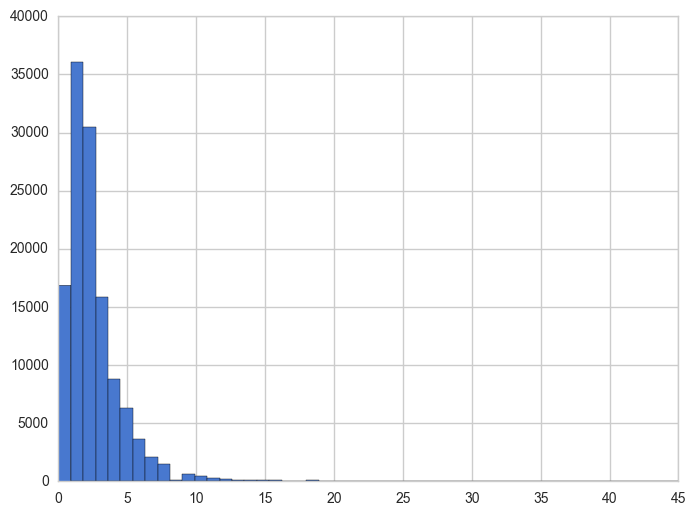

In [15]:
d.photos_per_room.hist(bins=50)

# Save the Data

In [19]:
d[['num_photos', 'has_photos', 'photos_per_room']].to_csv('tmp/features_photos.csv')